In [9]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt
from io import StringIO
import matplotlib.cm as cm
import re

%matplotlib inline

## PCA

In [2]:
def pca(filename):
    with open(filename) as f:
        raw_data = np.genfromtxt(StringIO(f.read()), delimiter="\t",dtype='str')
        data = raw_data[:,:-1].astype(float)
        label = raw_data[:,-1]
    data_adjust = data - np.mean(data, axis=0)
    # w, v will be complex value for pca_demo.txt data
    w, v = np.linalg.eig(np.cov(data_adjust.T))
    return data_adjust.dot(v[np.argsort(w)[-2:]].T), label

In [3]:
def plot_data(*param):
    data, labels, algo, dataset = param
    data_t = data.T
    label_set = set(labels)
    color_map = dict(zip(label_set, cm.rainbow(np.linspace(0, 1, len(label_set)))))
    for label in label_set:
        index = np.where(labels == label)
        plt.scatter(data_t[0][index], data_t[1][index], s=20, c=color_map[label],
                    alpha=0.5, label=label)
    
    m = re.search(r'(\w+).txt', dataset)
    plt.title(algo + " on " + m.group(1))
    plt.legend(loc='best')
    plt.savefig('../img/' + algo + "_on_"+ m.group(1))
    plt.show()

## Project

In [4]:
data, labels = pca('../data/pca_a.txt')
data_b, labels_b = pca('../data/pca_b.txt')
data_c, labels_c = pca('../data/pca_c.txt')

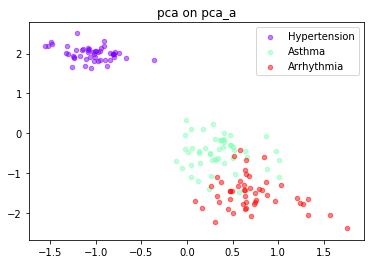

In [5]:
plot_data(data, labels, 'pca', 'pca_a.txt')

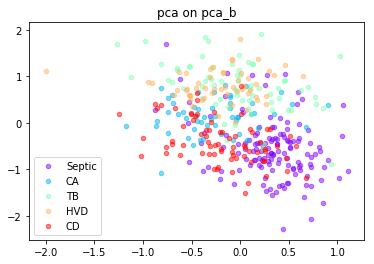

In [6]:
plot_data(data_b, labels_b, 'pca', 'pca_b.txt')

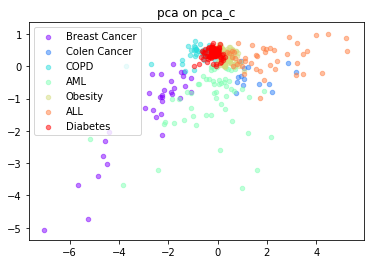

In [7]:
plot_data(data_c, labels_c, 'pca', 'pca_c.txt')

## SVD

In [10]:
def svd(filename):
    with open(filename) as f:
        raw_data = np.genfromtxt(StringIO(f.read()), delimiter="\t",dtype='str')
        data = raw_data[:,:-1].astype(float)
        label = raw_data[:,-1]
    U, s, V = np.linalg.svd(data)
    S = np.zeros((U.shape[0],2))
    S[:2, :2] = np.diag(s[:2])
    return U.dot(S), label

In [11]:
data_svd, labels_svd = svd('../data/pca_a.txt')
data_b_svd, labels_b_svd = svd('../data/pca_b.txt')
data_c_svd, labels_c_svd = svd('../data/pca_c.txt')

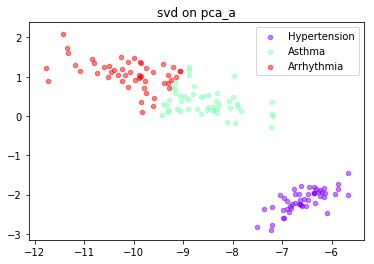

In [12]:
plot_data(data_svd, labels_svd, 'svd', 'pca_a.txt')

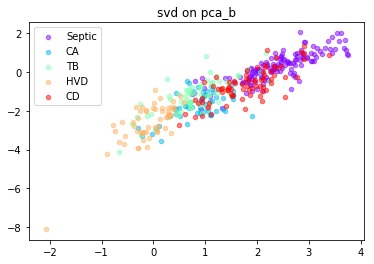

In [13]:
plot_data(data_b_svd, labels_b_svd, 'svd', 'pca_b.txt')

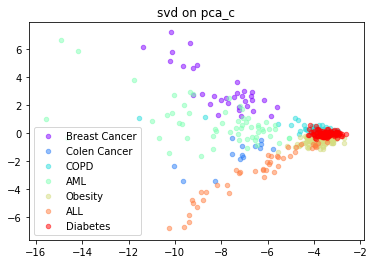

In [14]:
plot_data(data_c_svd, labels_c_svd, 'svd', 'pca_c.txt')

## T-SNE

In [15]:
def tsne(filename):
    with open(filename) as f:
        raw_data = np.genfromtxt(StringIO(f.read()), delimiter="\t",dtype='str')
        data = raw_data[:,:-1].astype(float)
        label = raw_data[:,-1]
    return TSNE(n_components=2).fit_transform(data), label

In [16]:
data_tsne, labels_tsne = tsne('../data/pca_a.txt')
data_b_tsne, labels_b_tsne = tsne('../data/pca_b.txt')
data_c_tsne, labels_c_tsne = tsne('../data/pca_c.txt')

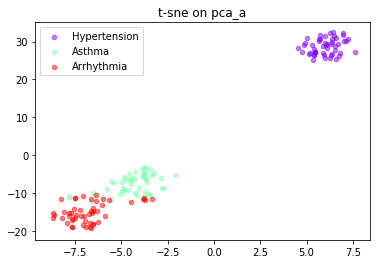

In [17]:
plot_data(data_tsne, labels_tsne, 't-sne', 'pca_a.txt')

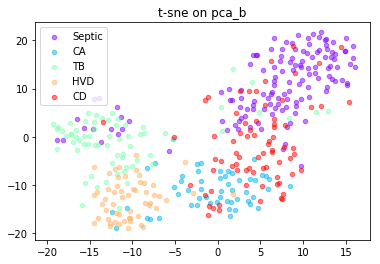

In [18]:
plot_data(data_b_tsne, labels_b_tsne, 't-sne', 'pca_b.txt')

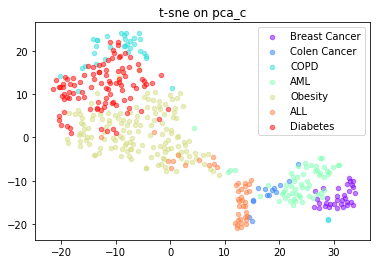

In [19]:
plot_data(data_c_tsne, labels_c_tsne, 't-sne', 'pca_c.txt')

## Demo

In [23]:
data_demo, labels_demo = pca('../data/pca_demo.txt')
data_demo_svd, labels_demo_svd = svd('../data/pca_demo.txt')
data_demo_tsne, labels_demo_tsne = tsne('../data/pca_demo.txt')

/Users/xu/Desktop/UB-COURSE/573ComputerVision/myOpencv/tutorial-env/lib/python3.7/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


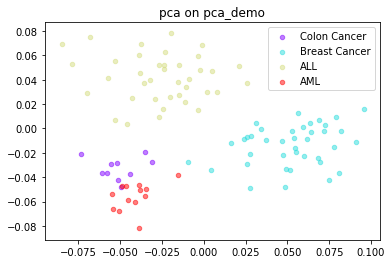

In [24]:
plot_data(data_demo, labels_demo, 'pca', 'pca_demo.txt')

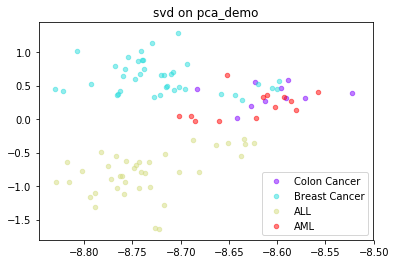

In [25]:
plot_data(data_demo_svd, labels_demo_svd, 'svd', 'pca_demo.txt')

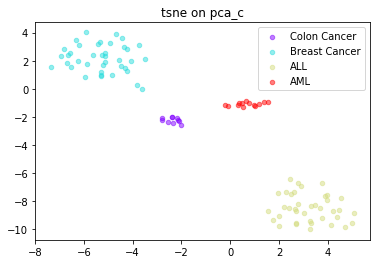

In [26]:
plot_data(data_demo_tsne, labels_demo_tsne, 'tsne', 'pca_c.txt')